<a href="https://colab.research.google.com/github/rayouaz/ComparativeAFTrashRecycling/blob/master/CV_Relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re

In [0]:
torch.cuda.is_available()
zipped_no = "dataset-resized.zip"
zipped_da = "dataset-resized-augment.zip"

In [3]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [4]:
files = zf.ZipFile(zipped_no,'r')
files.extractall()
files.close()
os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['.DS_Store', 'cardboard', 'metal', 'paper', 'glass', 'plastic', 'trash']

In [5]:
## get a path to the folder with images
path = Path(os.getcwd())/"dataset-resized"
path

PosixPath('/content/dataset-resized')

In [0]:
tfms = get_transforms(do_flip=True,flip_vert=True)#, xtra_tfms = rand_resize_crop(224))
data = (ImageList.from_folder(path)
  .split_none()
  .label_from_folder()
  .transform(tfms, size=224)
  .databunch(bs=16)).normalize()

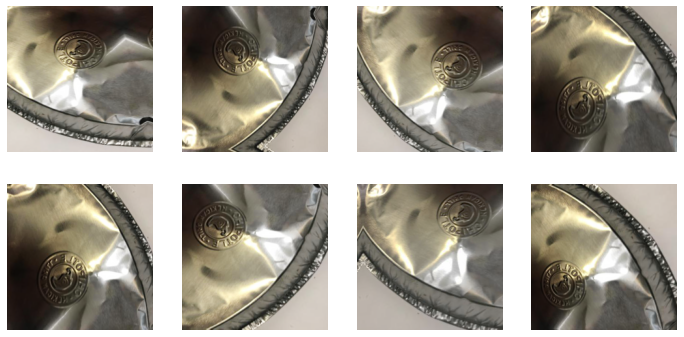

In [0]:
data

def get_ex(): return open_image(os.getcwd()+"/dataset-resized/metal/metal11.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

plots_f(2,4,12,6,size=224)

In [0]:
print(data.classes)
learn = cnn_learner(data,models.densenet121,metrics=error_rate)
learn.summary()

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


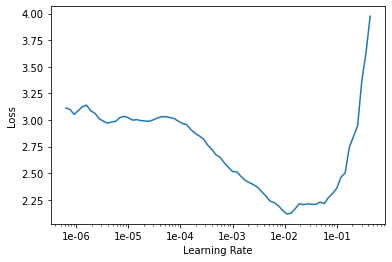

In [7]:
learn = cnn_learner(data,models.resnet101,metrics=error_rate)
learn.summary()
learn.lr_find()
learn.recorder.plot()

In [0]:
torch.cuda.empty_cache()

Fold = 1


epoch,train_loss,valid_loss,error_rate,time
0,1.548373,0.770814,0.268775,00:35
1,1.119236,0.551666,0.179842,00:35
2,0.812693,0.470546,0.152174,00:34
3,0.733579,0.628896,0.154150,00:35
4,0.695365,0.384680,0.116601,00:34
5,0.592285,0.633648,0.132411,00:35
6,0.474554,0.293835,0.110672,00:35
7,0.428995,0.294171,0.102767,00:35
8,0.349704,0.263441,0.086957,00:35
9,0.383320,0.228121,0.073123,00:35


Fold = 1


Fold = 2


epoch,train_loss,valid_loss,error_rate,time
0,1.618551,0.701177,0.256917,00:35
1,1.050970,0.510452,0.173913,00:35
2,0.830872,0.438423,0.150198,00:35
3,0.746861,0.478779,0.146245,00:35
4,0.724850,0.447134,0.132411,00:35
5,0.587076,0.363895,0.122530,00:34
6,0.488914,0.370739,0.120553,00:34
7,0.516681,0.343114,0.094862,00:35
8,0.413415,0.343731,0.088933,00:34
9,0.380206,0.282876,0.081028,00:34


Fold = 2


Fold = 3


epoch,train_loss,valid_loss,error_rate,time
0,1.569508,0.788759,0.281188,00:33
1,1.045188,0.630439,0.203960,00:33
2,0.837365,0.597868,0.178218,00:33
3,0.699745,0.557993,0.156436,00:33
4,0.646029,0.420162,0.144554,00:33
5,0.505455,0.485063,0.142574,00:33
6,0.503518,0.427364,0.124752,00:32
7,0.446120,0.413012,0.106931,00:32
8,0.448120,0.429871,0.126733,00:33
9,0.400087,0.405556,0.110891,00:32


Fold = 3


Fold = 4


epoch,train_loss,valid_loss,error_rate,time
0,1.584730,0.723818,0.275248,00:32
1,1.026821,0.551827,0.178218,00:32
2,0.810054,0.477260,0.164356,00:32
3,0.740396,0.461770,0.154455,00:32
4,0.628930,0.423561,0.138614,00:32
5,0.542878,0.428035,0.130693,00:33
6,0.461055,0.397996,0.128713,00:33
7,0.436711,0.341184,0.112871,00:32
8,0.396558,0.465399,0.140594,00:32
9,0.410040,0.340079,0.104950,00:32


Fold = 4


Fold = 5


epoch,train_loss,valid_loss,error_rate,time
0,1.634852,0.757309,0.255446,00:33
1,1.066042,0.547889,0.176238,00:33
2,0.851567,0.482424,0.160396,00:33
3,0.730657,0.455032,0.132673,00:33
4,0.654649,0.437518,0.126733,00:33
5,0.626531,0.430384,0.130693,00:33
6,0.536941,0.332058,0.116832,00:33
7,0.467070,0.336527,0.095050,00:33
8,0.421659,0.286489,0.085149,00:33
9,0.351951,0.336737,0.089109,00:33


Fold = 5


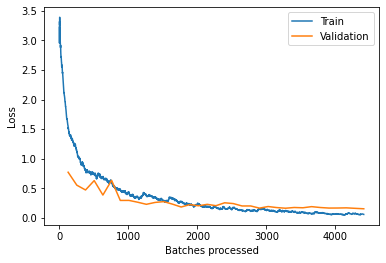

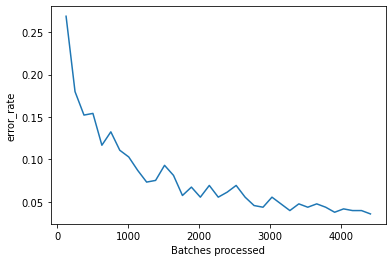

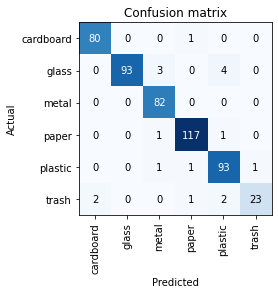

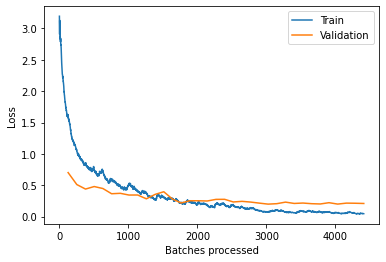

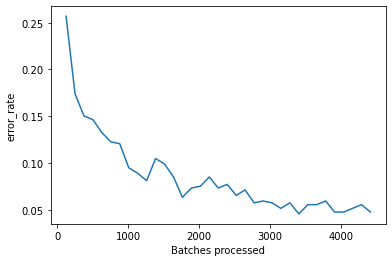

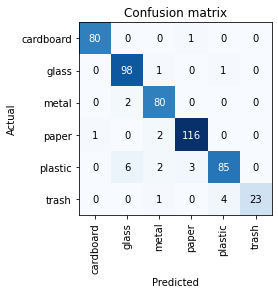

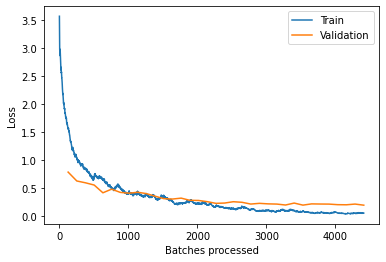

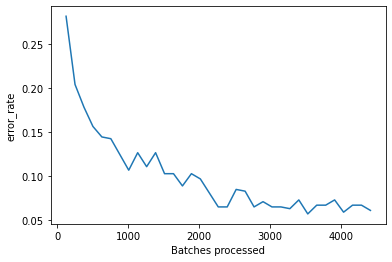

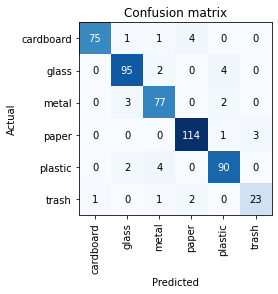

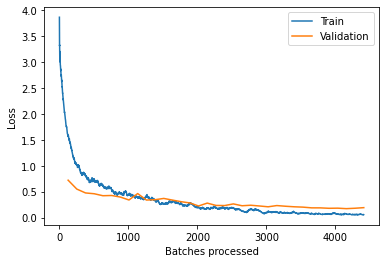

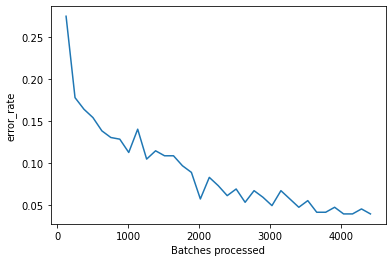

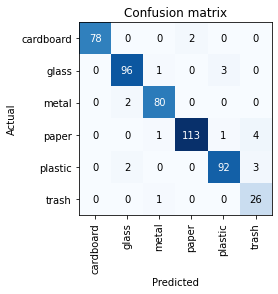

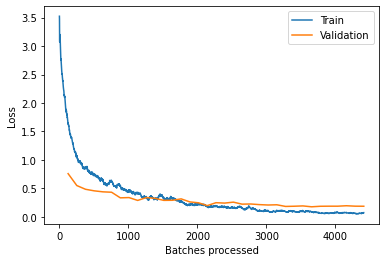

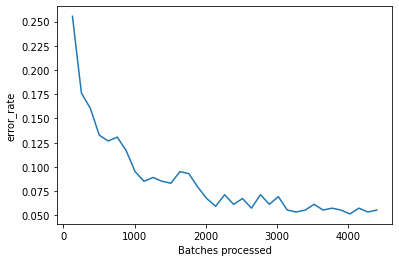

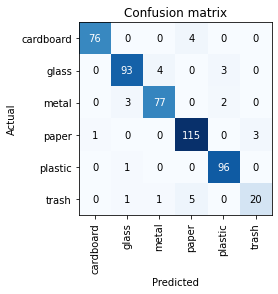

In [8]:
torch.cuda.empty_cache()
from sklearn.model_selection import StratifiedKFold
import numpy
acc_val = []
numpy.array([1,2,3])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
df = data.to_df()
df.head()
i=0
for train_index, val_index in skf.split(df.index, df['y']):
  i+=1
  data_fold = (ImageList.from_df(df, path)
  .split_by_idxs(train_index, val_index)
  .label_from_df()
  .transform(tfms, size=224)
  .databunch(bs=16)).normalize()
  print("Fold = " + str(i))
  learn = cnn_learner(data_fold,models.resnet101,metrics=error_rate)
  learn.fit_one_cycle(35,max_lr=slice(5e-04,9e-04))
  print("Fold = " + str(i))
  learn.recorder.plot_losses()
  learn.recorder.plot_metrics()
  inter = ClassificationInterpretation.from_learner(learn)
  inter.plot_confusion_matrix()
  loss,acc = learn.validate()
  acc_val.append(acc.numpy())

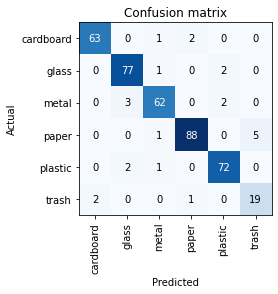

In [0]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

In [10]:
#learn.model

print("acc mean:" +str(1-numpy.mean(acc_val)))
print("acc std:" +str(numpy.std(acc_val)))

acc mean:0.952112078666687
acc std:0.009589648
